/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


5.71689792737366 5.513483964950729


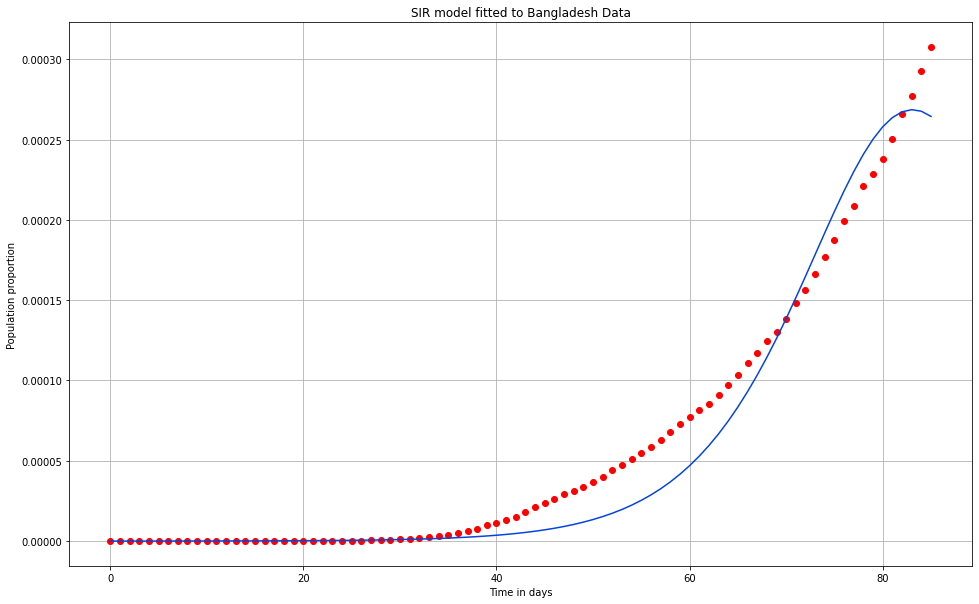

In [19]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
 
 
#actual data from the COVID-19 situation in Bangladesh
ydata = ([0.000000018633540, 0.000000018633540, 0.000000018633540, 0.000000018633540, 
          0.000000018633540, 0.000000018633540, 0.000000018633540, 0.000000031055901, 
          0.000000049689441, 0.000000049689441, 0.000000062111801, 0.000000086956522, 
          0.000000105590062, 0.000000149068323, 0.000000167701863, 0.000000204968944, 
          0.000000242236025, 0.000000242236025, 0.000000298136646, 0.000000298136646, 
          0.000000298136646, 0.000000304347826, 0.000000304347826, 0.000000335403727, 
          0.000000335403727, 0.000000347826087, 0.000000378881988, 0.000000434782609, 
          0.000000546583851, 0.000000763975155, 0.000001018633540, 0.000001354037267, 
          0.000002049689441, 0.000002633540373, 0.000002993788820, 0.000003857142857, 
          0.000004987577640, 0.000006285714286, 0.000007645962733, 0.000009763975155, 
          0.000011416149068, 0.000013316770186, 0.000015254658385, 0.000018310559006, 
          0.000021006211180, 0.000023428571429, 0.000026000000000, 0.000029124223602, 
          0.000031043478261, 0.000033639751553, 0.000036726708075, 0.000040136645963, 
          0.000044118012422, 0.000047621118012, 0.000051167701863, 0.000054596273292, 
          0.000058726708075, 0.000063000000000, 0.000067881987578, 0.000072788819876, 
          0.000077173913043, 0.000081577639752, 0.000085527950311, 0.000091037267081, 
          0.000097459627329, 0.000103478260870, 0.000110695652174, 0.000117161490683, 
          0.000124627329193, 0.000130403726708, 0.000138310559006, 0.000148260869565,
          0.000156031055901, 0.000166074534161, 0.000177086956522, 0.000187608695652,
          0.000199242236025, 0.000208757763975, 0.000221024844720, 0.000228267080745,
          0.000237838509317, 0.000250440993789, 0.000266111801242, 0.000277068322981,
          0.000292875776398, 0.000307664596273])
xdata = ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
          21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
          40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
          59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
          78, 79, 80, 81, 82, 83, 84, 85]) 


ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)
 
 
#declaring the ODEs
def sird_model(y, x, beta, gamma, delta):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    D = delta * y[1]
    I = -(S + R + D)
    return S, I, R, D
 
 
#integrating
def fit_odeint(x, beta, delta):
    return integrate.odeint(sird_model, (S0, I0, R0, D0), x, args=(beta, gamma, delta))[:,1]
 
 
#parameters
N = 1.0
I0 = ydata[0]
S0 = N - I0
R0 = 0.0
D0 = 0.0
gamma = 1.0/14.0
 
 
#fitting the model with data
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
print(popt[0], popt[1]) 
fitted = fit_odeint(xdata, *popt)
 
 
#plotting the curves
plt.figure(figsize=[16.18,10]);
plt.grid()
plt.plot(xdata, ydata, 'ro')
plt.plot(xdata, fitted, 'xkcd:blue')
#print(fitted)
plt.xlabel("Time in days")
plt.ylabel("Population proportion")
plt.title("SIR model fitted to Bangladesh Data")
plt.show()